In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: DE
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


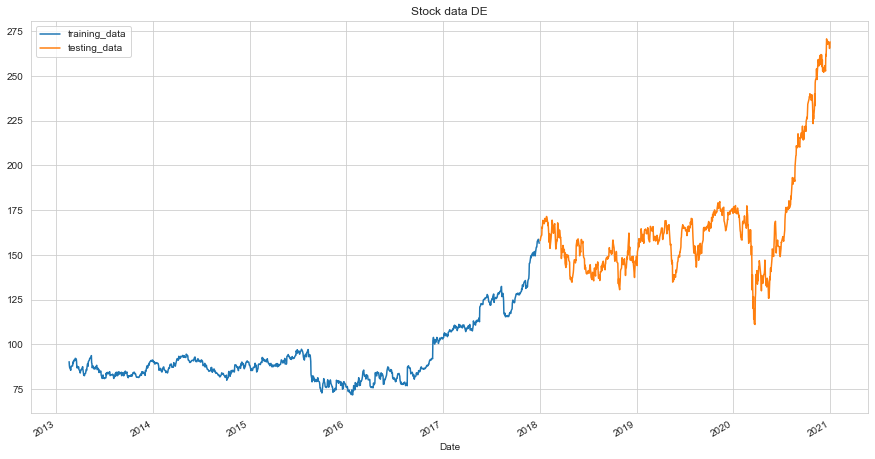

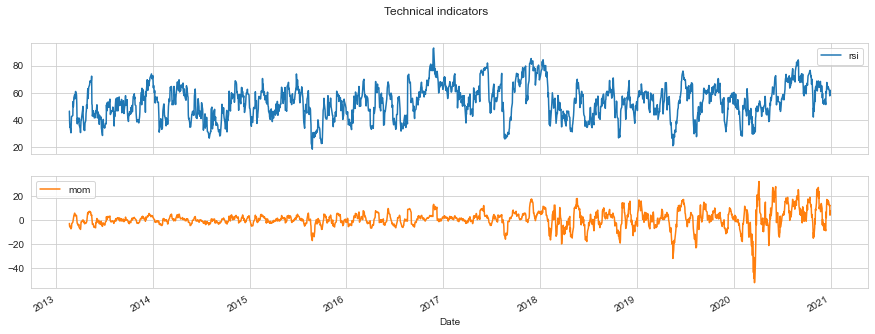

In [2]:
stock_name = 'de'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1249.66, duration: 0:00:00.328073
episode: 2/2000, episode end value: 1236.66, duration: 0:00:00.278374
episode: 3/2000, episode end value: 1244.85, duration: 0:00:00.287063
episode: 4/2000, episode end value: 1245.10, duration: 0:00:00.263190
episode: 5/2000, episode end value: 1247.69, duration: 0:00:00.262057
episode: 6/2000, episode end value: 1245.05, duration: 0:00:00.256247
episode: 7/2000, episode end value: 1250.92, duration: 0:00:00.293065
episode: 8/2000, episode end value: 1232.24, duration: 0:00:00.228156
episode: 9/2000, episode end value: 1242.95, duration: 0:00:00.225818
episode: 10/2000, episode end value: 1248.49, duration: 0:00:00.238053
episode: 11/2000, episode end value: 1237.44, duration: 0:00:00.242816
episode: 12/2000, episode end value: 1239.64, duration: 0:00:00.242028
episode: 13/2000, episode end value: 1241.29, duration: 0:00:00.245830
episode: 14/2000, episode end value: 1237.99, duration: 0:00:00.269249
episode: 15/200

episode: 117/2000, episode end value: 1239.21, duration: 0:00:00.389268
episode: 118/2000, episode end value: 1265.38, duration: 0:00:00.276143
episode: 119/2000, episode end value: 1239.88, duration: 0:00:00.288245
episode: 120/2000, episode end value: 1249.36, duration: 0:00:00.266151
episode: 121/2000, episode end value: 1244.25, duration: 0:00:00.294314
episode: 122/2000, episode end value: 1240.69, duration: 0:00:00.260060
episode: 123/2000, episode end value: 1256.25, duration: 0:00:00.319582
episode: 124/2000, episode end value: 1244.94, duration: 0:00:00.275202
episode: 125/2000, episode end value: 1240.53, duration: 0:00:00.263229
episode: 126/2000, episode end value: 1230.59, duration: 0:00:00.243992
episode: 127/2000, episode end value: 1238.62, duration: 0:00:00.269481
episode: 128/2000, episode end value: 1246.88, duration: 0:00:00.258872
episode: 129/2000, episode end value: 1259.24, duration: 0:00:00.280519
episode: 130/2000, episode end value: 1236.24, duration: 0:00:00

episode: 231/2000, episode end value: 1244.51, duration: 0:00:00.387375
episode: 232/2000, episode end value: 1270.18, duration: 0:00:00.361402
episode: 233/2000, episode end value: 1247.99, duration: 0:00:00.346892
episode: 234/2000, episode end value: 1260.91, duration: 0:00:00.424745
episode: 235/2000, episode end value: 1262.86, duration: 0:00:00.360448
episode: 236/2000, episode end value: 1241.84, duration: 0:00:00.409971
episode: 237/2000, episode end value: 1248.75, duration: 0:00:00.441360
episode: 238/2000, episode end value: 1244.30, duration: 0:00:00.384084
episode: 239/2000, episode end value: 1242.29, duration: 0:00:00.352080
episode: 240/2000, episode end value: 1248.97, duration: 0:00:00.318708
episode: 241/2000, episode end value: 1258.54, duration: 0:00:00.372839
episode: 242/2000, episode end value: 1274.74, duration: 0:00:00.330963
episode: 243/2000, episode end value: 1245.31, duration: 0:00:00.365877
episode: 244/2000, episode end value: 1252.37, duration: 0:00:00

episode: 345/2000, episode end value: 1238.44, duration: 0:00:00.407665
episode: 346/2000, episode end value: 1237.46, duration: 0:00:00.381958
episode: 347/2000, episode end value: 1258.11, duration: 0:00:00.376015
episode: 348/2000, episode end value: 1242.57, duration: 0:00:00.410514
episode: 349/2000, episode end value: 1260.75, duration: 0:00:00.419386
episode: 350/2000, episode end value: 1237.41, duration: 0:00:00.409815
episode: 351/2000, episode end value: 1261.41, duration: 0:00:00.356518
episode: 352/2000, episode end value: 1259.78, duration: 0:00:00.350842
episode: 353/2000, episode end value: 1241.40, duration: 0:00:00.379171
episode: 354/2000, episode end value: 1241.59, duration: 0:00:00.339759
episode: 355/2000, episode end value: 1263.76, duration: 0:00:00.351056
episode: 356/2000, episode end value: 1239.05, duration: 0:00:00.441878
episode: 357/2000, episode end value: 1241.58, duration: 0:00:00.349074
episode: 358/2000, episode end value: 1238.16, duration: 0:00:00

episode: 459/2000, episode end value: 1242.93, duration: 0:00:00.401702
episode: 460/2000, episode end value: 1242.43, duration: 0:00:00.374465
episode: 461/2000, episode end value: 1248.93, duration: 0:00:00.395694
episode: 462/2000, episode end value: 1248.15, duration: 0:00:00.350426
episode: 463/2000, episode end value: 1258.11, duration: 0:00:00.411815
episode: 464/2000, episode end value: 1240.71, duration: 0:00:00.344063
episode: 465/2000, episode end value: 1254.89, duration: 0:00:00.408360
episode: 466/2000, episode end value: 1251.29, duration: 0:00:00.446637
episode: 467/2000, episode end value: 1247.24, duration: 0:00:00.441785
episode: 468/2000, episode end value: 1255.35, duration: 0:00:00.402246
episode: 469/2000, episode end value: 1255.04, duration: 0:00:00.323755
episode: 470/2000, episode end value: 1249.45, duration: 0:00:00.414948
episode: 471/2000, episode end value: 1242.06, duration: 0:00:00.393356
episode: 472/2000, episode end value: 1262.05, duration: 0:00:00

episode: 573/2000, episode end value: 1243.37, duration: 0:00:00.434253
episode: 574/2000, episode end value: 1259.30, duration: 0:00:00.346897
episode: 575/2000, episode end value: 1266.39, duration: 0:00:00.320326
episode: 576/2000, episode end value: 1244.52, duration: 0:00:00.391363
episode: 577/2000, episode end value: 1258.44, duration: 0:00:00.423783
episode: 578/2000, episode end value: 1249.34, duration: 0:00:00.448839
episode: 579/2000, episode end value: 1245.53, duration: 0:00:00.399348
episode: 580/2000, episode end value: 1244.37, duration: 0:00:00.364113
episode: 581/2000, episode end value: 1274.58, duration: 0:00:00.393102
episode: 582/2000, episode end value: 1257.18, duration: 0:00:00.422030
episode: 583/2000, episode end value: 1263.78, duration: 0:00:00.430755
episode: 584/2000, episode end value: 1243.95, duration: 0:00:00.368935
episode: 585/2000, episode end value: 1240.34, duration: 0:00:00.365184
episode: 586/2000, episode end value: 1263.76, duration: 0:00:00

episode: 687/2000, episode end value: 1242.30, duration: 0:00:00.449135
episode: 688/2000, episode end value: 1255.90, duration: 0:00:00.336968
episode: 689/2000, episode end value: 1269.62, duration: 0:00:00.299897
episode: 690/2000, episode end value: 1244.99, duration: 0:00:00.303389
episode: 691/2000, episode end value: 1261.24, duration: 0:00:00.352824
episode: 692/2000, episode end value: 1245.89, duration: 0:00:00.298043
episode: 693/2000, episode end value: 1249.67, duration: 0:00:00.440852
episode: 694/2000, episode end value: 1270.26, duration: 0:00:00.374811
episode: 695/2000, episode end value: 1265.20, duration: 0:00:00.364772
episode: 696/2000, episode end value: 1247.61, duration: 0:00:00.351951
episode: 697/2000, episode end value: 1254.64, duration: 0:00:00.410224
episode: 698/2000, episode end value: 1262.65, duration: 0:00:00.407865
episode: 699/2000, episode end value: 1271.42, duration: 0:00:00.369140
episode: 700/2000, episode end value: 1241.67, duration: 0:00:00

episode: 801/2000, episode end value: 1238.50, duration: 0:00:00.340983
episode: 802/2000, episode end value: 1261.90, duration: 0:00:00.334277
episode: 803/2000, episode end value: 1250.29, duration: 0:00:00.492170
episode: 804/2000, episode end value: 1241.57, duration: 0:00:00.337952
episode: 805/2000, episode end value: 1237.13, duration: 0:00:00.355073
episode: 806/2000, episode end value: 1252.35, duration: 0:00:00.328222
episode: 807/2000, episode end value: 1252.19, duration: 0:00:00.389137
episode: 808/2000, episode end value: 1260.17, duration: 0:00:00.331630
episode: 809/2000, episode end value: 1242.80, duration: 0:00:00.387315
episode: 810/2000, episode end value: 1267.86, duration: 0:00:00.362912
episode: 811/2000, episode end value: 1260.72, duration: 0:00:00.367540
episode: 812/2000, episode end value: 1249.48, duration: 0:00:00.398825
episode: 813/2000, episode end value: 1257.73, duration: 0:00:00.345455
episode: 814/2000, episode end value: 1257.02, duration: 0:00:00

episode: 915/2000, episode end value: 1262.15, duration: 0:00:00.397052
episode: 916/2000, episode end value: 1267.56, duration: 0:00:00.369760
episode: 917/2000, episode end value: 1245.10, duration: 0:00:00.405756
episode: 918/2000, episode end value: 1248.88, duration: 0:00:00.416864
episode: 919/2000, episode end value: 1242.31, duration: 0:00:00.318377
episode: 920/2000, episode end value: 1297.23, duration: 0:00:00.289605
episode: 921/2000, episode end value: 1245.25, duration: 0:00:00.360721
episode: 922/2000, episode end value: 1249.61, duration: 0:00:00.351585
episode: 923/2000, episode end value: 1242.33, duration: 0:00:00.369992
episode: 924/2000, episode end value: 1249.69, duration: 0:00:00.404268
episode: 925/2000, episode end value: 1244.78, duration: 0:00:00.386330
episode: 926/2000, episode end value: 1267.02, duration: 0:00:00.348752
episode: 927/2000, episode end value: 1251.64, duration: 0:00:00.355685
episode: 928/2000, episode end value: 1241.26, duration: 0:00:00

episode: 1029/2000, episode end value: 1251.37, duration: 0:00:00.332716
episode: 1030/2000, episode end value: 1249.56, duration: 0:00:00.332762
episode: 1031/2000, episode end value: 1257.00, duration: 0:00:00.325658
episode: 1032/2000, episode end value: 1250.66, duration: 0:00:00.312901
episode: 1033/2000, episode end value: 1241.71, duration: 0:00:00.329125
episode: 1034/2000, episode end value: 1238.69, duration: 0:00:00.325293
episode: 1035/2000, episode end value: 1237.25, duration: 0:00:00.358018
episode: 1036/2000, episode end value: 1263.67, duration: 0:00:00.411493
episode: 1037/2000, episode end value: 1241.32, duration: 0:00:00.344264
episode: 1038/2000, episode end value: 1277.47, duration: 0:00:00.318131
episode: 1039/2000, episode end value: 1250.69, duration: 0:00:00.307006
episode: 1040/2000, episode end value: 1237.78, duration: 0:00:00.382995
episode: 1041/2000, episode end value: 1268.83, duration: 0:00:00.380457
episode: 1042/2000, episode end value: 1248.27, dur

episode: 1142/2000, episode end value: 1241.97, duration: 0:00:00.374230
episode: 1143/2000, episode end value: 1240.15, duration: 0:00:00.402285
episode: 1144/2000, episode end value: 1233.80, duration: 0:00:00.473648
episode: 1145/2000, episode end value: 1271.63, duration: 0:00:00.344085
episode: 1146/2000, episode end value: 1272.26, duration: 0:00:00.352723
episode: 1147/2000, episode end value: 1244.05, duration: 0:00:00.451681
episode: 1148/2000, episode end value: 1242.18, duration: 0:00:00.388032
episode: 1149/2000, episode end value: 1242.66, duration: 0:00:00.379656
episode: 1150/2000, episode end value: 1261.96, duration: 0:00:00.358500
episode: 1151/2000, episode end value: 1270.20, duration: 0:00:00.322920
episode: 1152/2000, episode end value: 1243.32, duration: 0:00:00.381739
episode: 1153/2000, episode end value: 1260.41, duration: 0:00:00.363531
episode: 1154/2000, episode end value: 1245.46, duration: 0:00:00.369265
episode: 1155/2000, episode end value: 1240.71, dur

episode: 1255/2000, episode end value: 1245.28, duration: 0:00:00.378742
episode: 1256/2000, episode end value: 1261.39, duration: 0:00:00.330147
episode: 1257/2000, episode end value: 1241.67, duration: 0:00:00.421696
episode: 1258/2000, episode end value: 1249.97, duration: 0:00:00.369782
episode: 1259/2000, episode end value: 1339.22, duration: 0:00:00.311244
episode: 1260/2000, episode end value: 1241.49, duration: 0:00:00.362394
episode: 1261/2000, episode end value: 1255.85, duration: 0:00:00.389415
episode: 1262/2000, episode end value: 1248.69, duration: 0:00:00.457957
episode: 1263/2000, episode end value: 1252.12, duration: 0:00:00.335223
episode: 1264/2000, episode end value: 1263.92, duration: 0:00:00.411476
episode: 1265/2000, episode end value: 1262.99, duration: 0:00:00.376138
episode: 1266/2000, episode end value: 1247.09, duration: 0:00:00.405270
episode: 1267/2000, episode end value: 1259.17, duration: 0:00:00.409216
episode: 1268/2000, episode end value: 1232.00, dur

episode: 1368/2000, episode end value: 1257.23, duration: 0:00:00.341895
episode: 1369/2000, episode end value: 1261.14, duration: 0:00:00.357989
episode: 1370/2000, episode end value: 1248.47, duration: 0:00:00.390542
episode: 1371/2000, episode end value: 1243.64, duration: 0:00:00.332224
episode: 1372/2000, episode end value: 1254.43, duration: 0:00:00.386715
episode: 1373/2000, episode end value: 1248.21, duration: 0:00:00.382957
episode: 1374/2000, episode end value: 1242.48, duration: 0:00:00.400534
episode: 1375/2000, episode end value: 1253.58, duration: 0:00:00.370357
episode: 1376/2000, episode end value: 1259.30, duration: 0:00:00.421804
episode: 1377/2000, episode end value: 1259.42, duration: 0:00:00.336457
episode: 1378/2000, episode end value: 1275.43, duration: 0:00:00.326762
episode: 1379/2000, episode end value: 1245.58, duration: 0:00:00.351132
episode: 1380/2000, episode end value: 1249.72, duration: 0:00:00.371490
episode: 1381/2000, episode end value: 1249.82, dur

episode: 1481/2000, episode end value: 1276.28, duration: 0:00:00.387319
episode: 1482/2000, episode end value: 1242.10, duration: 0:00:00.355351
episode: 1483/2000, episode end value: 1247.50, duration: 0:00:00.378059
episode: 1484/2000, episode end value: 1252.42, duration: 0:00:00.374857
episode: 1485/2000, episode end value: 1252.92, duration: 0:00:00.342445
episode: 1486/2000, episode end value: 1241.53, duration: 0:00:00.334639
episode: 1487/2000, episode end value: 1261.82, duration: 0:00:00.357775
episode: 1488/2000, episode end value: 1249.81, duration: 0:00:00.329514
episode: 1489/2000, episode end value: 1329.51, duration: 0:00:00.303454
episode: 1490/2000, episode end value: 1242.37, duration: 0:00:00.350149
episode: 1491/2000, episode end value: 1249.28, duration: 0:00:00.448574
episode: 1492/2000, episode end value: 1244.73, duration: 0:00:00.354203
episode: 1493/2000, episode end value: 1259.47, duration: 0:00:00.304434
episode: 1494/2000, episode end value: 1250.90, dur

episode: 1594/2000, episode end value: 1274.72, duration: 0:00:00.420868
episode: 1595/2000, episode end value: 1276.94, duration: 0:00:00.344455
episode: 1596/2000, episode end value: 1255.49, duration: 0:00:00.398139
episode: 1597/2000, episode end value: 1245.06, duration: 0:00:00.337921
episode: 1598/2000, episode end value: 1238.75, duration: 0:00:00.366386
episode: 1599/2000, episode end value: 1243.88, duration: 0:00:00.387449
episode: 1600/2000, episode end value: 1240.15, duration: 0:00:00.356256
episode: 1601/2000, episode end value: 1245.07, duration: 0:00:00.341995
episode: 1602/2000, episode end value: 1253.06, duration: 0:00:00.369031
episode: 1603/2000, episode end value: 1241.40, duration: 0:00:00.396367
episode: 1604/2000, episode end value: 1249.35, duration: 0:00:00.310800
episode: 1605/2000, episode end value: 1243.07, duration: 0:00:00.345061
episode: 1606/2000, episode end value: 1244.26, duration: 0:00:00.356802
episode: 1607/2000, episode end value: 1259.89, dur

episode: 1707/2000, episode end value: 1265.80, duration: 0:00:00.355415
episode: 1708/2000, episode end value: 1254.43, duration: 0:00:00.387514
episode: 1709/2000, episode end value: 1247.79, duration: 0:00:00.403540
episode: 1710/2000, episode end value: 1248.88, duration: 0:00:00.414839
episode: 1711/2000, episode end value: 1266.12, duration: 0:00:00.385644
episode: 1712/2000, episode end value: 1246.01, duration: 0:00:00.437352
episode: 1713/2000, episode end value: 1253.61, duration: 0:00:00.360825
episode: 1714/2000, episode end value: 1271.08, duration: 0:00:00.371740
episode: 1715/2000, episode end value: 1253.85, duration: 0:00:00.409217
episode: 1716/2000, episode end value: 1258.83, duration: 0:00:00.384183
episode: 1717/2000, episode end value: 1261.17, duration: 0:00:00.374667
episode: 1718/2000, episode end value: 1242.31, duration: 0:00:00.337852
episode: 1719/2000, episode end value: 1251.25, duration: 0:00:00.357628
episode: 1720/2000, episode end value: 1282.46, dur

episode: 1820/2000, episode end value: 1248.36, duration: 0:00:00.363070
episode: 1821/2000, episode end value: 1252.58, duration: 0:00:00.422309
episode: 1822/2000, episode end value: 1250.11, duration: 0:00:00.435302
episode: 1823/2000, episode end value: 1266.20, duration: 0:00:00.340744
episode: 1824/2000, episode end value: 1242.73, duration: 0:00:00.426846
episode: 1825/2000, episode end value: 1246.79, duration: 0:00:00.407244
episode: 1826/2000, episode end value: 1257.63, duration: 0:00:00.406813
episode: 1827/2000, episode end value: 1251.24, duration: 0:00:00.340189
episode: 1828/2000, episode end value: 1261.82, duration: 0:00:00.361539
episode: 1829/2000, episode end value: 1368.37, duration: 0:00:00.274165
episode: 1830/2000, episode end value: 1242.75, duration: 0:00:00.323418
episode: 1831/2000, episode end value: 1262.15, duration: 0:00:00.418614
episode: 1832/2000, episode end value: 1255.96, duration: 0:00:00.375524
episode: 1833/2000, episode end value: 1257.24, dur

episode: 1933/2000, episode end value: 1259.89, duration: 0:00:00.330942
episode: 1934/2000, episode end value: 1260.45, duration: 0:00:00.356838
episode: 1935/2000, episode end value: 1254.43, duration: 0:00:00.380431
episode: 1936/2000, episode end value: 1275.19, duration: 0:00:00.319212
episode: 1937/2000, episode end value: 1259.94, duration: 0:00:00.302585
episode: 1938/2000, episode end value: 1258.48, duration: 0:00:00.315003
episode: 1939/2000, episode end value: 1267.24, duration: 0:00:00.279585
episode: 1940/2000, episode end value: 1257.37, duration: 0:00:00.329615
episode: 1941/2000, episode end value: 1255.90, duration: 0:00:00.344644
episode: 1942/2000, episode end value: 1245.58, duration: 0:00:00.327674
episode: 1943/2000, episode end value: 1317.91, duration: 0:00:00.287393
episode: 1944/2000, episode end value: 1244.48, duration: 0:00:00.291192
episode: 1945/2000, episode end value: 1239.39, duration: 0:00:00.327890
episode: 1946/2000, episode end value: 1243.32, dur

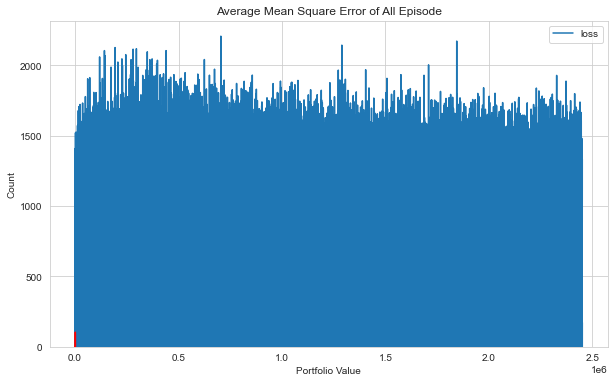

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

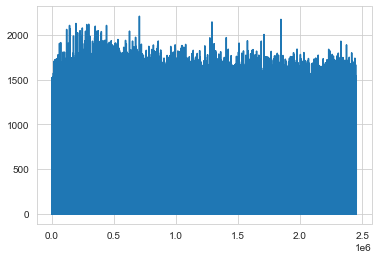

In [5]:
plt.plot(agent.model.losses)

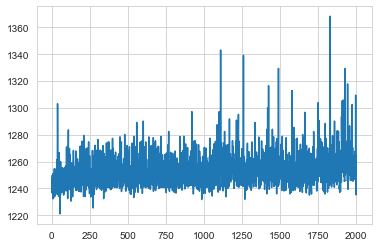

In [6]:
plt.plot(portfolio_value)

episode end value: 1292.63, duration: 0:00:00.226964
Sell: 396 times, Buy: 356 times


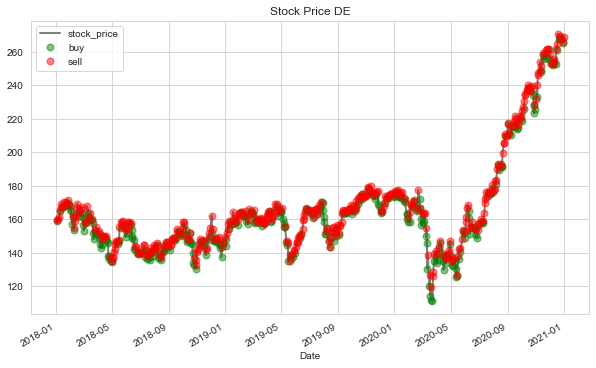

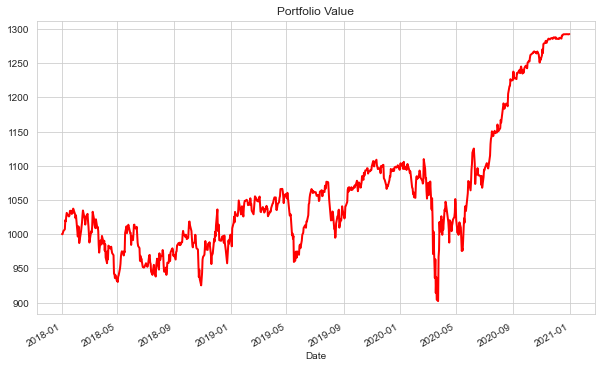

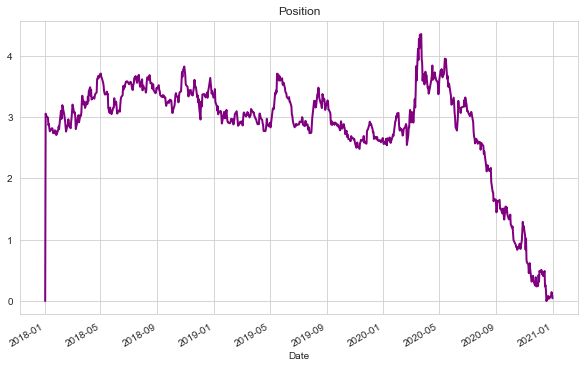

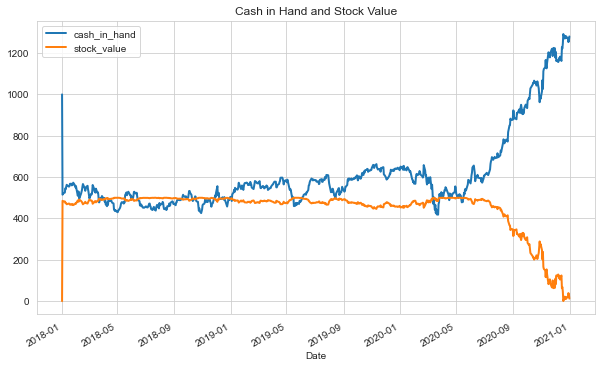

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: DE
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 8.93 %
Volatility: 0.1669
shape ratio: 0.4692
Maximun drawdown: -18.70 %
Calmar ratio: 0.4776
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 19.41 %
Volatility (benchmark): 0.3528
shape ratio: 0.5191
Maximun drawdown: -38.18 %
Calmar ratio (benchmark): 0.5084


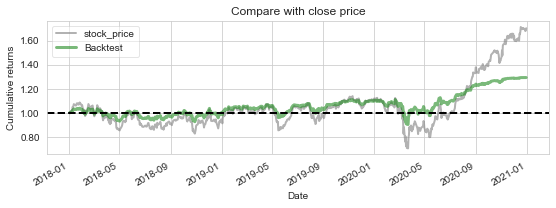

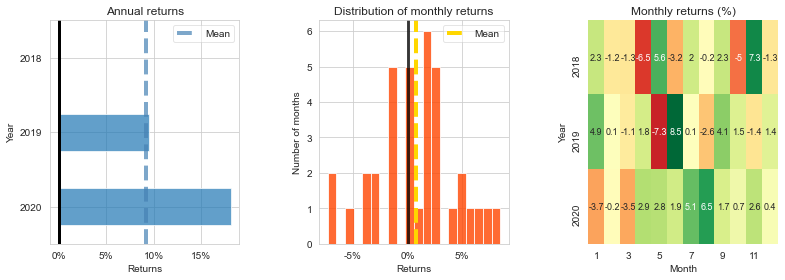

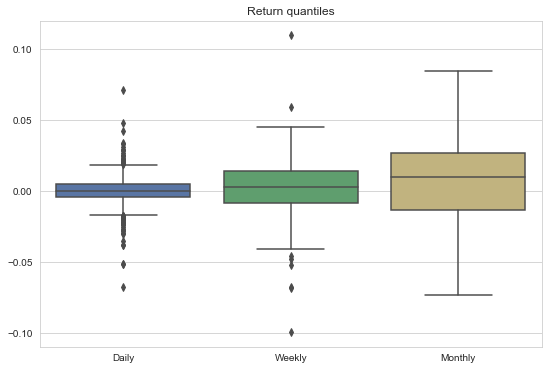

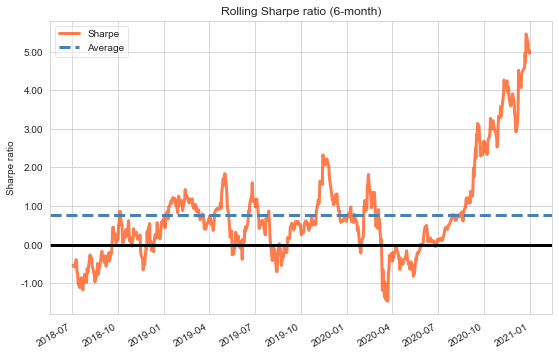

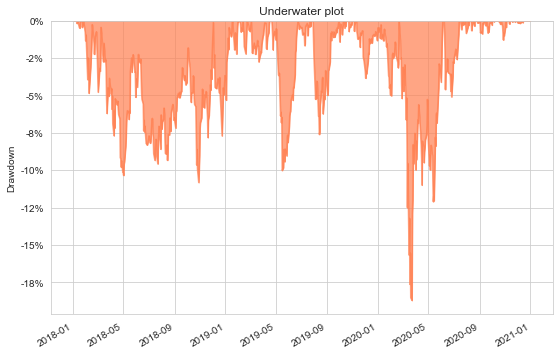

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')